In [17]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

open("sine_model.tflite","wb").write(tflite_model)

converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

def representative_dataset_generator():
    for value in x_test:
        yield [np.array(value, dtype=np.float32, ndmin=2)]

converter.representative_dataset = representative_dataset_generator

tflite_model = converter.convert()

open("sine_model_quantized.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Administrator\AppData\Local\Temp\tmppof5hxa9\assets


INFO:tensorflow:Assets written to: C:\Users\Administrator\AppData\Local\Temp\tmppof5hxa9\assets


Saved artifact at 'C:\Users\Administrator\AppData\Local\Temp\tmppof5hxa9'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2052764550592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2052772757568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2052807365024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2052764565920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2052807924016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2052807922960: TensorSpec(shape=(), dtype=tf.resource, name=None)
INFO:tensorflow:Assets written to: C:\Users\Administrator\AppData\Local\Temp\tmpxjnw4ixw\assets


INFO:tensorflow:Assets written to: C:\Users\Administrator\AppData\Local\Temp\tmpxjnw4ixw\assets


Saved artifact at 'C:\Users\Administrator\AppData\Local\Temp\tmpxjnw4ixw'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2052764550592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2052772757568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2052807365024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2052764565920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2052807924016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2052807922960: TensorSpec(shape=(), dtype=tf.resource, name=None)


C:\ProgramData\anaconda3\envs\tensor_workspace\lib\site-packages\tensorflow\lite\python\convert.py:854: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


3792

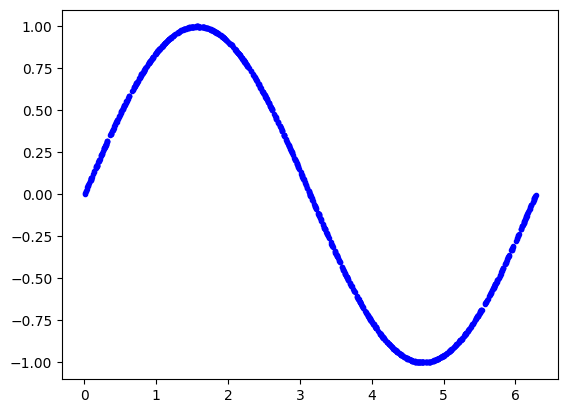

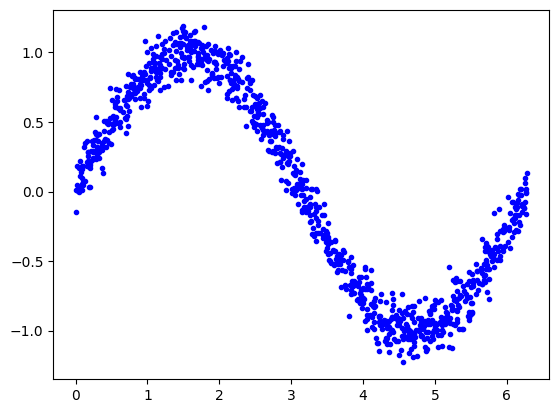

In [ ]:
#!pip install tensorflow==2.0.0-beta0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

SAMPLES = 1000

SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

np.random.shuffle(x_values)

y_values = np.sin(x_values)
TRAIN_SPLIT = int(0.6 *SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
plt.plot(x_values, y_values, 'b.')
plt.show()


y_values += 0.1*np.random.randn(*y_values.shape)

plt.plot(x_values, y_values, 'b.')
plt.show()

x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])


sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_output_index = sine_model_quantized.get_output_details()[0]["index"]

sine_model_predictions = []
#sine_model_quantized_predictions = []

for x_value in x_test:
    x_value_tensor =tf.convert_to_tensor([[x_value]],dtype=np.float32)
    sine_model.set_tensor(sine_model_input_index, x_value_tensor)
    sine_model.invoke()
    sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0])

    #sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)
    #sine_model_quantized.invoke()
    #sine_model_quantized_predictions.append(sine_model_quantized.get_sensor(sine_model_quantized_output_index)[0])


plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
#plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions')
#plt.plot(x_test, sine_model_quantized_predictions, 'gx', label='Lite quantized predictions')

plt.legend()
plt.show()


In [20]:
import os 

basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes " % basic_model_size)

quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Diffrence is %d bytes" %difference)

Basic model is 3164 bytes 
Quantized model is 3792 bytes
Diffrence is -628 bytes
